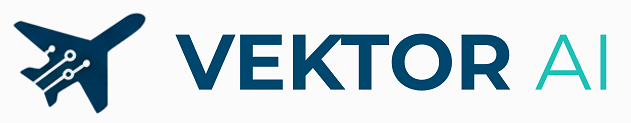

# **Armado y Elección del Set de Datos Propio con información de vuelos**

Para formar el set de datos propio se recurrió a datos de aerolíneas del [Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=)  del Departamento de transporte de Estados Unidos (United States Department of Transportation) (Consultado el 17 de diciembre de 2025).

Se decidió tomar un año de datos, desde octubre de 2024 a septiembre de 2025 e inicialmente trabajar con las 109 variables de la base de datos (Parte I).

Por motivos de procesamiento, se trabajó de forma preliminar con sólo dos aerolíneas para que el set de datos pudiese ser leído en la cuenta gratuita de Google Colab (Parte II).

Una vez que se realizaron algunos modelos preliminares, se procedió a trabajar con las 15 aerolíneas disponibles en ese rango de tiempo, pero con variables seleccionadas (Parte III).

## **0. Descripción de las 109 Variables**

**Time Period:**

0. **YEAR:** Year

1. **QUARTER:** Quarter(1-4)

2. **MONTH:** Month

3. **DAY_OF_MONTH:** Day of the Month

4. **DAY_OF_WEEK:** Day of the week

5. **FL_DATE:** Flight Date (yyymmdd)

**Airline**

6. **OP_UNIQUE_CARRIER:** Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.

7. **OP_CARRIER_AIRLINE_ID:** An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.

8. **OP_CARRIER:** Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.

9. **TAIL_NUM:** Tail Number

10. **OP_CARRIER_FL_NUM:** Flight Number

**Origin**

11. **ORIGIN_AIRPORT_ID:** Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.

12. **ORIGIN_AIRPORT_SEQ_ID:** Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.	Get Lookup Table

13. **ORIGIN_CITY_MARKET_ID:** Origin Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.

14. **ORIGIN:** 	Origin Airport

15. **ORIGIN_CITY_NAME:** Origin Airport, City Name

16. **ORIGIN_STATE_ABR:** Origin Airport, State Code

17. **ORIGIN_STATE_FIPS:** 	Origin Airport, State Fips

18. **ORIGIN_STATE_NM:** Origin Airport, State Name

19. **ORIGIN_WAC:** 	Origin Airport, World Area Code

**Destination**

20. **DEST_AIRPORT_ID:** Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.

21. **DEST_AIRPORT_SEQ_ID:** Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.

22. **DEST_CITY_MARKET_ID:**	Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.

23. **DEST:**	Destination Airport

24. **DEST_CITY_NAME:** Destination Airport, City Name

25. **DEST_STATE_ABR:** 	Destination Airport, State Code

26. **DEST_STATE_FIPS:** 	Destination Airport, State Fips

27. **DEST_STATE_NM:** Destination Airport, State Name

28. **DEST_WAC:** Destination Airport, World Area Code

**Departure Performance**

29. **CRS_DEP_TIME:**	CRS Departure Time (local time: hhmm)

30. **DEP_TIME:** Actual Departure Time (local time: hhmm)

31. **DEP_DELAY:**	Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.

32. **DEP_DELAY_NEW:**	Difference in minutes between scheduled and actual departure time. Early departures set to 0.

33. **DEP_DEL15:**	Departure Delay Indicator, 15 Minutes or More (1=Yes)

34. **DEP_DELAY_GROUP:**	Departure Delay intervals, every (15 minutes from <-15 to >180)

35. **DEP_TIME_BLK:**	CRS Departure Time Block, Hourly Intervals

36. **TAXI_OUT:**	Taxi Out Time, in Minutes

37. **WHEELS_OFF:** Wheels Off Time (local time: hhmm)

**Arrival Performance**

38. **WHEELS_ON:**	Wheels On Time (local time: hhmm)

39. **TAXI_IN:**	Taxi In Time, in Minutes

40. **CRS_ARR_TIME:**	CRS Arrival Time (local time: hhmm)

41. **ARR_TIME:**	Actual Arrival Time (local time: hhmm)

42. **ARR_DELAY:**	Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

43. **ARR_DELAY_NEW:**	Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.

44. **ARR_DEL15:**	Arrival Delay Indicator, 15 Minutes or More (1=Yes)

45. **ARR_DELAY_GROUP:**	Arrival Delay intervals, every (15-minutes from <-15 to >180)

46. **ARR_TIME_BLK:**	CRS Arrival Time Block, Hourly Intervals


**Cancellations and Diversions**

47. **CANCELLED:**	Cancelled Flight Indicator (1=Yes)

48. **CANCELLATION_CODE:**	Specifies The Reason For Cancellation

49. **DIVERTED:**	Diverted Flight Indicator (1=Yes)

**Flight Summaries**

50. **CRS_ELAPSED_TIME:**	CRS Elapsed Time of Flight, in Minutes

51. **ACTUAL_ELAPSED_TIME:**	Elapsed Time of Flight, in Minutes

52. **AIR_TIME:**	Flight Time, in Minutes

53. **FLIGHTS:**	Number of Flights

54. **DISTANCE:**	Distance between airports (miles)

55. **DISTANCE_GROUP:**	Distance Intervals, every 250 Miles, for Flight Segment

**Cause of Delay (Data starts 6/2003)**

56. **CARRIER_DELAY:**	Carrier Delay, in Minutes

57. **WEATHER_DELAY:**	Weather Delay, in Minutes

58. **NAS_DELAY:**	National Air System Delay, in Minutes

59. **SECURITY_DELAY:**	Security Delay, in Minutes

60. **LATE_AIRCRAFT_DELAY:**	Late Aircraft Delay, in Minutes

**Gate Return Information at Origin Airport (Data starts 10/2008)**

61. **FIRST_DEP_TIME:**	First Gate Departure Time at Origin Airport

62. **TOTAL_ADD_GTIME**	Total Ground Time Away from Gate for Gate Return or Cancelled Flight

63. **LONGEST_ADD_GTIME:**	Longest Time Away from Gate for Gate Return or Cancelled Flight

**Diverted Airport Information (Data starts 10/2008)**

64. **DIV_AIRPORT_LANDINGS:**	Number of Diverted Airport Landings

65. **DIV_REACHED_DEST:**	Diverted Flight Reaching Scheduled Destination Indicator (1=Yes)

66. **DIV_ACTUAL_ELAPSED_TIME:**	Elapsed Time of Diverted Flight Reaching Scheduled Destination, in Minutes. The ActualElapsedTime column remains NULL for all diverted flights.

67. **DIV_ARR_DELAY:** Difference in minutes between scheduled and actual arrival time for a diverted flight reaching scheduled destination. The ArrDelay column remains NULL for all diverted flights.

68. **DIV_DISTANCE:**	Distance between scheduled destination and final diverted airport (miles). Value will be 0 for diverted flight reaching scheduled destination.

69. **DIV1_AIRPORT:**	Diverted Airport Code1

70. **DIV1_AIRPORT_ID:**	Airport ID of Diverted Airport 1. Airport ID is a Unique Key for an Airport

71. **DIV1_AIRPORT_SEQ_ID:**	Airport Sequence ID of Diverted Airport 1. Unique Key for Time Specific Information for an Airport

72. **DIV1_WHEELS_ON:**	Wheels On Time (local time: hhmm) at Diverted Airport Code1

73. **DIV1_TOTAL_GTIME:**	Total Ground Time Away from Gate at Diverted Airport Code1

74. **DIV1_LONGEST_GTIME:**	Longest Ground Time Away from Gate at Diverted Airport Code1

75. **DIV1_WHEELS_OFF:**	Wheels Off Time (local time: hhmm) at Diverted Airport Code1

76. **DIV1_TAIL_NUM:**	Aircraft Tail Number for Diverted Airport Code1

77. **DIV2_AIRPORT:**	Diverted Airport Code2

78. **DIV2_AIRPORT_ID:**	Airport ID of Diverted Airport 2. Airport ID is a Unique Key for an Airport

79. **DIV2_AIRPORT_SEQ_ID:**	Airport Sequence ID of Diverted Airport 2. Unique Key for Time Specific Information for an Airport

80. **DIV2_WHEELS_ON:**	Wheels On Time (local time: hhmm) at Diverted Airport Code2

81. **DIV2_TOTAL_GTIME:**	Total Ground Time Away from Gate at Diverted Airport Code2

82. **DIV2_LONGEST_GTIME:**	Longest Ground Time Away from Gate at Diverted Airport Code2

83. **DIV2_WHEELS_OFF:**	Wheels Off Time (local time: hhmm) at Diverted Airport Code2

84. **DIV2_TAIL_NUM:**	Aircraft Tail Number for Diverted Airport Code2

85. **DIV3_AIRPORT:**	Diverted Airport Code3

86. **DIV3_AIRPORT_ID:** Airport ID of Diverted Airport 3. Airport ID is a Unique Key for an Airport

87. **DIV3_AIRPORT_SEQ_ID:**	Airport Sequence ID of Diverted Airport 3. Unique Key for Time Specific Information for an Airport

88. **DIV3_WHEELS_ON:**	Wheels On Time (local time: hhmm) at Diverted Airport Code3

89. **DIV3_TOTAL_GTIME:**	Total Ground Time Away from Gate at Diverted Airport Code3

90. **DIV3_LONGEST_GTIME:**	Longest Ground Time Away from Gate at Diverted Airport Code3

91. **DIV3_WHEELS_OFF:**	Wheels Off Time (local time: hhmm) at Diverted Airport Code3

92. **DIV3_TAIL_NUM:**	Aircraft Tail Number for Diverted Airport Code3

93. **DIV4_AIRPORT:**	Diverted Airport Code4

94. **DIV4_AIRPORT_ID:**	Airport ID of Diverted Airport 4. Airport ID is a Unique Key for an Airport

95. **DIV4_AIRPORT_SEQ_ID:**	Airport Sequence ID of Diverted Airport 4. Unique Key for Time Specific Information for an Airport

96. **DIV4_WHEELS_ON:**	Wheels On Time (local time: hhmm) at Diverted Airport Code4

97. **DIV4_TOTAL_GTIME:**	Total Ground Time Away from Gate at Diverted Airport Code4

98. **DIV4_LONGEST_GTIME:**	Longest Ground Time Away from Gate at Diverted Airport Code4

99. **DIV4_WHEELS_OFF:**	Wheels Off Time (local time: hhmm) at Diverted Airport Code4

100. **DIV4_TAIL_NUM:**	Aircraft Tail Number for Diverted Airport Code4

101. **DIV5_AIRPORT:**	Diverted Airport Code5

102. **DIV5_AIRPORT_ID:**	Airport ID of Diverted Airport 5. Airport ID is a Unique Key for an Airport

103. **DIV5_AIRPORT_SEQ_ID:**	Airport Sequence ID of Diverted Airport 5. Unique Key for Time Specific Information for an Airport

104. **DIV5_WHEELS_ON:**	Wheels On Time (local time: hhmm) at Diverted Airport Code5

105. **DIV5_TOTAL_GTIME:**	Total Ground Time Away from Gate at Diverted Airport Code5

106. **DIV5_LONGEST_GTIME:**	Longest Ground Time Away from Gate at Diverted Airport Code5

107. **DIV5_WHEELS_OFF:**	Wheels Off Time (local time: hhmm) at Diverted Airport Code5

108. **DIV5_TAIL_NUM:**	Aircraft Tail Number for Diverted Airport Code5

# **PARTE I: Datos de un año - 109 variables**

## **1. Importación de Datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Octubre 2024 - Septiembre 2025 Datos Creando dataframe**

In [ ]:
import pandas as pd
import os

# Creando dataframe con datos de 2025_separados por mes

df_2025_09 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_09.csv")
df_2025_08 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_08.csv")
df_2025_07 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_07.csv")
df_2025_06 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_06.csv")
df_2025_05 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_05.csv")
df_2025_04 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_04.csv")
df_2025_03 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_03.csv")
df_2025_02 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_02.csv")
df_2025_01 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_01.csv")
df_2024_12 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2024/2024_12.csv")
df_2024_11 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2024/2024_11.csv")
df_2024_10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2024/2024_10.csv")


/tmp/ipython-input-3898891645.py:6: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025_09 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_09.csv")
/tmp/ipython-input-3898891645.py:7: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025_08 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_08.csv")
/tmp/ipython-input-3898891645.py:8: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025_07 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/Transtats/2025/2025_07.csv")
/tmp/ipython-input-3898891645.py:9: DtypeWarning: Columns (77,84,85,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2025_06 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hackaton 2025

## **2. Generar el dataframe**

In [ ]:
df_one_year = pd.concat(     # apila los DataFrames uno debajo del otro
    [df_2024_10, df_2024_11, df_2024_12, df_2025_01, df_2025_02, df_2025_03, df_2025_04, df_2025_05, df_2025_06, df_2025_07, df_2025_08, df_2025_09],
    axis=0,          # unir filas
    ignore_index=True   # reinicia el índice
)

df_one_year.shape

## **3. Guardando Dataframe como .csv**

In [ ]:
# Guardando el Dataframe completo
df_one_year.to_csv("/content/flight_delays_one_year.csv", index=False)

## **4. Cambio de ubicación a ubicación definitiva**

In [ ]:
# Cambiando la ubicación del archivo desde el temporal hasta ubicación definitiva
import shutil
shutil.move("/content/flight_delays_one_year.csv", "/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/flight_delays_one_year.csv")

'/content/drive/MyDrive/Colab Notebooks/Hackaton 2025 Oracle/flight_delays_JAS_2025.csv'

# **PARTE II: Datos de un año pero sólo dos aerolíneas - 109 variables**

## **1. Importación de Datos**

In [ ]:
# The following code will only execute
# successfully when compression is complete

import kagglehub

# Download latest version
path = kagglehub.dataset_download("spmv1980/hackaton-2025-equipo-71")

print("Path to dataset files:", path)

100%|██████████| 990M/990M [00:34<00:00, 30.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/spmv1980/hackaton-2025-equipo-71/versions/13


In [ ]:
# Revisar contenido de la carpeta descargada
import os

for root, dirs, files in os.walk(path):
    print(f"\nDirectory: {root}")
    for file in files:
        print("  ", file)


Directory: /root/.cache/kagglehub/datasets/spmv1980/hackaton-2025-equipo-71/versions/13
   flight_delays_one_year_2a.csv
   df_procesado_todas las aerolneas.csv
   tail_map.csv
   flight_delays_one_year.csv
   flight_delays_15_aerolineas.csv
   df_procesado.csv


In [ ]:
import pandas as pd

# Transtat Octubre 2024 a Septiembre 2025  variables- ( registros)
df= pd.read_csv(os.path.join(path +"/flight_delays_one_year.csv"))

/tmp/ipython-input-3309190838.py:4: DtypeWarning: Columns (48,69,76,77,84,85,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(os.path.join(path +"/flight_delays_one_year.csv"))


## **2. Selección de principales dos aerolíneas**

In [ ]:
df['OP_UNIQUE_CARRIER'].value_counts()

,count
OP_UNIQUE_CARRIER,
WN,1386402
DL,1020029
AA,970791
OO,831445
UA,787314
YX,337830
MQ,289836
OH,249776
AS,244089


Se seleccionan las dos principales aerolíneas WN (Southwest Airlines Co.) y DL (Delta Air Lines Inc.)

In [ ]:
top_dos = df['OP_UNIQUE_CARRIER'].value_counts().head(2).index
df_filtrado = df[df['OP_UNIQUE_CARRIER'].isin(top_dos)]

In [ ]:
df_filtrado.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DIV4_WHEELS_OFF,DIV4_TAIL_NUM,DIV5_AIRPORT,DIV5_AIRPORT_ID,DIV5_AIRPORT_SEQ_ID,DIV5_WHEELS_ON,DIV5_TOTAL_GTIME,DIV5_LONGEST_GTIME,DIV5_WHEELS_OFF,DIV5_TAIL_NUM
4267,2024,4,10,1,2,10/1/2024 12:00:00 AM,DL,19790,DL,N101DQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4268,2024,4,10,1,2,10/1/2024 12:00:00 AM,DL,19790,DL,N101DQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4269,2024,4,10,1,2,10/1/2024 12:00:00 AM,DL,19790,DL,N101DQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4270,2024,4,10,1,2,10/1/2024 12:00:00 AM,DL,19790,DL,N101DQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4271,2024,4,10,1,2,10/1/2024 12:00:00 AM,DL,19790,DL,N101DU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_filtrado.shape

(2406431, 109)

## **3. Guardado de Dataframe**

In [ ]:
# Guardando el Dataframe completo
df_filtrado.to_csv("/content/flight_delays_one_year_2a.csv", index=False)

# **PARTE III: Datos de un año para 15 aerolíneas - 37 variables**

## **1. Importación de Datos**

In [ ]:
# The following code will only execute
# successfully when compression is complete

import kagglehub

# Download latest version
path = kagglehub.dataset_download("spmv1980/hackaton-2025-equipo-71")

print("Path to dataset files:", path)

100%|██████████| 770M/770M [00:19<00:00, 41.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/spmv1980/hackaton-2025-equipo-71/versions/11


In [ ]:
# Revisar contenido de la carpeta descargada
import os

for root, dirs, files in os.walk(path):
    print(f"\nDirectory: {root}")
    for file in files:
        print("  ", file)


Directory: /root/.cache/kagglehub/datasets/spmv1980/hackaton-2025-equipo-71/versions/11
   df_procesado.csv
   flight_delays_one_year.csv
   flight_delays_one_year_2a.csv
   flight_delays_all_a.csv
   tail_map.csv


In [ ]:
import pandas as pd

# Transtat Octubre 2024 a Septiembre 2025  variables- ( registros)
df= pd.read_csv(os.path.join(path +"/flight_delays_one_year.csv"))

/tmp/ipython-input-3309190838.py:4: DtypeWarning: Columns (48,69,76,77,84,85,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(os.path.join(path +"/flight_delays_one_year.csv"))


## **2. Eliminación de Variables**

In [ ]:
df = df.drop(columns=['DIV_AIRPORT_LANDINGS', 'DIV_REACHED_DEST','DIV_ACTUAL_ELAPSED_TIME','DIV_ARR_DELAY','DIV_DISTANCE',
                      'DIV1_AIRPORT','DIV1_AIRPORT_ID','DIV1_AIRPORT_SEQ_ID','DIV1_WHEELS_ON','DIV1_TOTAL_GTIME','DIV1_LONGEST_GTIME','DIV1_WHEELS_OFF','DIV1_TAIL_NUM',
                      'DIV2_AIRPORT','DIV2_AIRPORT_ID','DIV2_AIRPORT_SEQ_ID','DIV2_WHEELS_ON','DIV2_TOTAL_GTIME','DIV2_LONGEST_GTIME','DIV2_WHEELS_OFF','DIV2_TAIL_NUM',
                      'DIV3_AIRPORT','DIV3_AIRPORT_ID','DIV3_AIRPORT_SEQ_ID','DIV3_WHEELS_ON','DIV3_TOTAL_GTIME','DIV3_LONGEST_GTIME','DIV3_WHEELS_OFF','DIV3_TAIL_NUM',
                      'DIV4_AIRPORT','DIV4_AIRPORT_ID','DIV4_AIRPORT_SEQ_ID','DIV4_WHEELS_ON','DIV4_TOTAL_GTIME','DIV4_LONGEST_GTIME','DIV4_WHEELS_OFF','DIV4_TAIL_NUM',
                      'DIV5_AIRPORT','DIV5_AIRPORT_ID','DIV5_AIRPORT_SEQ_ID','DIV5_WHEELS_ON','DIV5_TOTAL_GTIME','DIV5_LONGEST_GTIME','DIV5_WHEELS_OFF','DIV5_TAIL_NUM'])

In [ ]:
df = df.drop(columns=['ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','ORIGIN_STATE_FIPS','ORIGIN_STATE_NM','ORIGIN_WAC',
                      'DEST_CITY_NAME','DEST_STATE_ABR','DEST_STATE_FIPS','DEST_STATE_NM','DEST_WAC',
                      'DEP_DELAY_NEW', 'DEP_DELAY_GROUP','DEP_TIME_BLK','TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN',
                      'ARR_DELAY_NEW','ARR_DELAY_GROUP','ARR_TIME_BLK',
                      'CANCELLATION_CODE', 'AIR_TIME','DISTANCE_GROUP',
                      'CARRIER_DELAY', 'NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY',
                      ])

## **3. Guardado de Dataframe**

In [ ]:
# Guardando el Dataframe completo
df.to_csv("/content/flight_delays_15_aerolineas.csv", index=False)